# Build simple models to predict pulsar candidates

In this notebook we will look at building machine learning models to predict Pulsar Candidate. The data comes from Rob Lyon at Manchester. This data is publically available. For more information check out https://figshare.com/articles/HTRU2/3080389/1

#### Lets start with the basic imports


In [1]:
# For numerical stuff
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Some preprocessing utilities
from sklearn.cross_validation import train_test_split # Data splitting
from sklearn.utils import shuffle

# The different classifiers
from sklearn.neighbors import KNeighborsClassifier # Nearest Neighbor  - Analogizer
from sklearn.naive_bayes import GaussianNB # Bayesian Classifier - Bayesian
from sklearn.neural_network import MLPClassifier # Neural Network - Connectionist

# Model result function
from sklearn.metrics import classification_report,accuracy_score



/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Load dataset

* Data is a csv file with each column as features and rows as samples of positive and negative candidates

* Class label is the last column where "1" correspondes to true pulsar candidate and "0" a false candidate

In [2]:
data = pd.read_csv('Data/pulsar.csv')

# Show some information
print ('Dataset has %d rows and %d columns including features and labels'%(data.shape[0],data.shape[1]))

Dataset has 17898 rows and 9 columns including features and labels


#### Lets print the feature names

In [3]:
print (data.columns.values[0:-1])

['mean_int_pf' 'std_pf' 'ex_kurt_pf' 'skew_pf' 'mean_dm' 'std_dm' 'kurt_dm'
 'skew_dm']


#### Do a scatter plot 

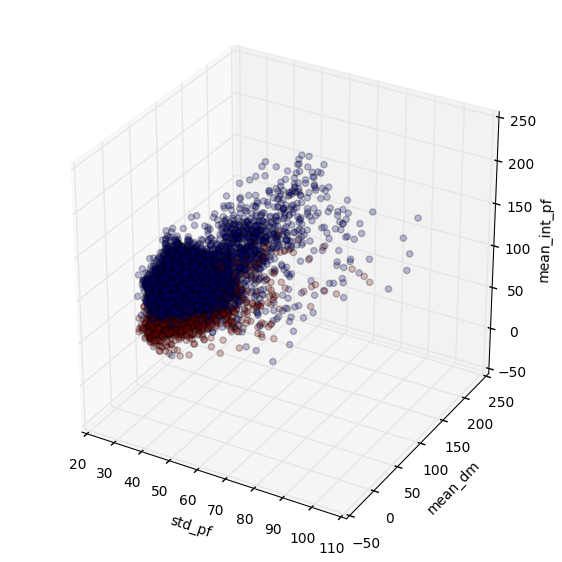

In [4]:
ax = plt.figure().gca(projection='3d')
ax.scatter3D(data['std_pf'], data['mean_dm'], data['mean_int_pf'],c=data['class'],alpha=.25)
ax.set_xlabel('std_pf')
ax.set_ylabel('mean_dm')
ax.set_zlabel('mean_int_pf')

#### Get the features and labels

In [5]:
# Lets shuffle the rows of the data 10 times
for i in range(10):
    data = shuffle(data)

# Now split the dataset into seperate variabels for features and labels
features = data.ix[:,data.columns != 'class'].values # All columns except class
labels = data['class'].values # Class labels

#### Split data to training and validation sets

In [6]:
# Do a 70 - 30 split of the whole data for training and testing
# The last argument specifies the fraction of samples for testing
train_data,test_data,train_labels,test_labels = train_test_split(features,labels,test_size=.3)
#Print some info
print ('Number of training data points : %d'%(train_data.shape[0]))
print ('Number of testing data points : %d'%(test_data.shape[0]))


Number of training data points : 12528
Number of testing data points : 5370


##### Lets do the training on different algorithms

We will be using the following algorithms

* k-Nearest Neighbours (KNN) [ https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm ]


* Naive Bayes Classifier [ https://en.wikipedia.org/wiki/Naive_Bayes_classifier ]


* Multilayer Neural Network [ https://en.wikipedia.org/wiki/Multilayer_perceptron ] 


### Lets start with default model parameters for each classifier.
Check the link above each block for function definition


* Scikit KNN

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [7]:
# K nearest neighbor
knn = KNeighborsClassifier()
knn.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

* Scikit Naive Bayes

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [8]:
# Naive Bayes
nb = GaussianNB()
nb.fit(train_data,train_labels)

GaussianNB(priors=None)

* Scikit MLP

https://en.wikipedia.org/wiki/Multilayer_perceptron

In [9]:
# MLP
mlp =  MLPClassifier(solver='sgd',hidden_layer_sizes=(5, 1))
mlp.fit(train_data,train_labels)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 1), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### Fancy function to print results for model evaluation

In [10]:
# Pretty function to test  a model and print accuracy score
def evaluate(model,modelname,test_data,test_labels):
    predictions = model.predict(test_data) # Do the actual prediction
    print('====================================================')
    print('Classification Report for %s'%modelname)
    print('===================================================')
    print(classification_report(test_labels,predictions,target_names=['Non Pulsar','Pulsar']))
    
    print('\n The model is %f accurate' %(accuracy_score(test_labels,predictions)*100))
    print('====================================================\n\n')
    
    
   

In [11]:
# Making some stuff easy
models =[knn,nb,mlp]
model_names =['KNN','Naive Bayes','Neural Network']

#### Now Lets test each classifier and disply their accuracy

In [12]:
for i in range(0,3):
    evaluate(models[i],model_names[i],test_data,test_labels)

Classification Report for KNN
             precision    recall  f1-score   support

 Non Pulsar       0.98      0.99      0.99      4880
     Pulsar       0.90      0.79      0.84       490

avg / total       0.97      0.97      0.97      5370


 The model is 97.281192 accurate


Classification Report for Naive Bayes
             precision    recall  f1-score   support

 Non Pulsar       0.98      0.96      0.97      4880
     Pulsar       0.66      0.85      0.74       490

avg / total       0.95      0.95      0.95      5370


 The model is 94.599628 accurate


Classification Report for Neural Network
             precision    recall  f1-score   support

 Non Pulsar       0.91      1.00      0.95      4880
     Pulsar       0.00      0.00      0.00       490

avg / total       0.83      0.91      0.87      5370


 The model is 90.875233 accurate




/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
